In [ ]:
# Installer les bibliothèques nécessaires
!pip install opencv-python-headless
!pip install scikit-image
!pip install pytesseract
!apt-get update && apt-get install -y tesseract-ocr
!pip install scipy


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,517 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Get:13 http://archive.ubuntu.com/ubuntu 

In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 10.5 MB/s eta 0:00:00


In [ ]:
# Installing the required modules
!pip install opencv-python
!pip install matplotlib
!pip install numpy
# Installing the CPU and CUDA
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr
# Importing the different libraries
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline
import os

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
from google.colab import files

# Téléversement du fichier
uploaded = files.upload()

# Récupération du chemin du fichier
img_path = list(uploaded.keys())[0]  # Nom du fichier téléversé
print(f"Fichier téléversé : {img_path}")


Saving images (1).jpg to images (1).jpg
Fichier téléversé : images (1).jpg


In [ ]:
# Recognise the text
def recognize_text(img_path):
    ''' loads an image and recognizes text. '''

    reader = easyocr.Reader(['en'])        # For English - 'en'  And,  For Hindi - 'hi'
    return reader.readtext(img_path)

In [ ]:
result = recognize_text(img_path)
result

[([[105, 59], [181, 59], [181, 79], [105, 79]],
  '9275 kWh',
  0.7958599126869862),
 ([[61, 75], [111, 75], [111, 95], [61, 95]], 'HEURE', 0.9995013580473718),
 ([[121, 77], [181, 77], [181, 97], [121, 97]], 'FLEINE', 0.9705984524635126)]

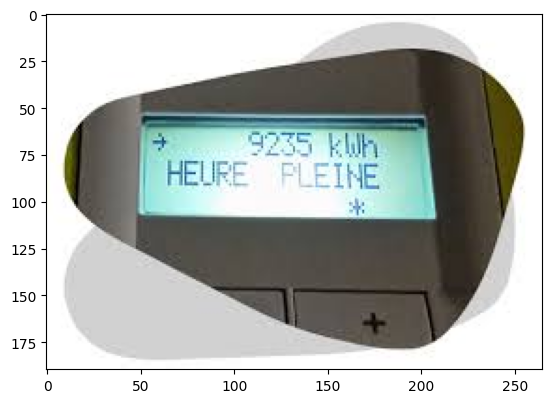

In [ ]:
img = cv2.imread(img_path)
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [ ]:
import os

def overlay_ocr_text(img_path, save_name):
    ''' loads an image, recognize text, and overlays the text on the image. '''

    # Load images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0] / dpi), int(img.shape[1] / dpi)
    plt.figure()
    f, axarr = plt.subplots(1, 2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # Recognize text
    result = recognize_text(img_path)

    # If OCR prob is over 0.2, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.2:
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # Get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # Create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # Put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)

    # Create the Output directory if it doesn't exist
    output_dir = './Output'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Show and save image
    axarr[1].imshow(img)
    plt.savefig(f'{output_dir}/{save_name}_overlay.jpg', bbox_inches='tight')


Detected text: 9275 kWh (Probability: 0.80)
Detected text: HEURE (Probability: 1.00)
Detected text: FLEINE (Probability: 0.97)


<Figure size 640x480 with 0 Axes>

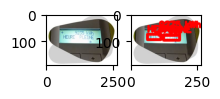

In [ ]:
overlay_ocr_text(img_path, 'Text3_Output')

In [ ]:
# Extracting text from the image
def ocr_text(img_path):

    result = recognize_text(img_path)

    # If OCR prob is over 0.2, overlay text
    for(bbox, text, prob) in result:
        if prob:
            print(f'{text}')

# Extracted Text
ocr_text(img_path)

9275 kWh
HEURE
FLEINE
